In [11]:
%matplotlib inline

In [12]:
import os
import time 
import numpy as np
import pandas as pd
import seaborn as sb
import h5py
import matplotlib.pyplot as plt
import itertools as it
import random

In [13]:
def corl(s1, s2, time_window):
    single1=pd.Series(s1)
    single2=pd.Series(s2)
    corrmat=np.zeros(shape=time_window-1, dtype=np.float64)
    
    for t in list(range(time_window-1)):
        #fill_value argument is introduced in pandas 0.24.0
        #corrmat[t]=single1.corr(single2.shift(periods=-t, fill_value=0.), method="pearson")
        corrmat[t]=single1.corr(single2.shift(periods=-t).fillna(0.), method="pearson")
        #print("delay time=", t, "corr=", corrmat[t])
        max_value=np.amax(corrmat)
        max_index=np.where(corrmat==max_value)[0]
        
    return max_index, max_value

def corl_dumy(s1, s2, time_window):
    print("This is a dumy function.")
    pass
    return None, 0.

In [14]:
with h5py.File("../output/7_sigma.h5", "r") as f:
    print(list(f.keys()))

    index=f["index"][:]
    sd=f["Spike_Data"][:]

['Spike_Data', 'index']


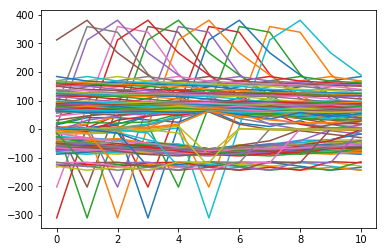

In [30]:
for row in sd: 
    pd.Series(row).plot()

In [15]:
#t = time.time()
#data = split_single_channel("190407_CA014_session_000.dat", np.int16, 374, 1)
#elapsed=time.time()-t
#print(elapsed)

In [32]:
single_number=sd.shape[0]
nsingle=list(range(sd.shape[0]))
time_window=sd.shape[1]
ntime=list(range(sd.shape[1]))
flags=np.ones(shape=sd.shape[0], dtype=np.int)
print(flags.shape[0])
#print(sd[:10,:])
#print(flags[:5])
#print(np.any(flags[:5]),np.argmax(flags > 0))
#a=pd.Series(sd[0,:])
#b=pd.Series(sd[5,:])
#corrma=np.zeros(shape=10, dtype=np.float64)
#print(b.shift(periods=-8).fillna(0.))

#for t in list(range(10)):
#    corrma[t]=a.corr(b.shift(periods=-t).fillna(0.), method="pearson")
#    print("delay time=", t, "corr=", corrma[t])
        
#max_value=np.amax(corrma)
#max_index=np.where(corrma==max_value)[0]
#print(max_value, max_index)
    

179


i= 0 	 j= 0 	 flags[i]= 0 flags[j]= 0
This is a dumy function.
0.0
i= 0 	 j= 1 	 flags[i]= 0 flags[j]= 1
0.4638787724454012
i= 0 	 j= 2 	 flags[i]= 0 flags[j]= 1
0.5243775577482418
i= 0 	 j= 3 	 flags[i]= 0 flags[j]= 1
0.5282463590729919
i= 0 	 j= 4 	 flags[i]= 0 flags[j]= 1
0.5223155938155761
i= 0 	 j= 5 	 flags[i]= 0 flags[j]= 1
0.5311075251933101
i= 0 	 j= 6 	 flags[i]= 0 flags[j]= 1
0.5275826361378312
i= 0 	 j= 7 	 flags[i]= 0 flags[j]= 1
0.5252282516102005
i= 0 	 j= 8 	 flags[i]= 0 flags[j]= 1
-0.04607544240660399
i= 0 	 j= 9 	 flags[i]= 0 flags[j]= 1
0.4692510763706784
i= 1 	 j= 0 	 flags[i]= 0 flags[j]= 0
This is a dumy function.
0.0
i= 1 	 j= 1 	 flags[i]= 0 flags[j]= 0
This is a dumy function.
0.0
i= 1 	 j= 2 	 flags[i]= 0 flags[j]= 1
0.5671777515196497
i= 1 	 j= 3 	 flags[i]= 0 flags[j]= 1
0.008288020091365837
i= 1 	 j= 4 	 flags[i]= 0 flags[j]= 1
-0.19526510260209176
i= 1 	 j= 5 	 flags[i]= 0 flags[j]= 1
-0.21482276697020744
i= 1 	 j= 6 	 flags[i]= 0 flags[j]= 1
-0.237791730

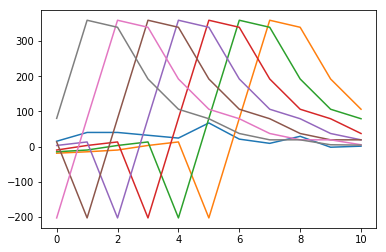

In [24]:
#function pointer list
cal_corr=[corl_dumy, corl]

#Because the outter loop list may change in the inner loop operation, so we use while here.
while (np.any(flags[:10])) :
    #print("Before", flags[:10])
    i=np.argmax(flags > 0)
    s1=sd[i,:]
    flags[i]=0
    #print("After", flags[:10])
    #for j in nsingle:
    #for j in list(it.compress(nsingle, flags)):
    for j in list(range(10)):
        s2=sd[j,:]
        print("i=", i, "\t", "j=", j, "\t", "flags[i]=", flags[i], "flags[j]=", flags[j])
        corr_coef=cal_corr[flags[j]](s1, s2, time_window)[1]
        print(corr_coef)
        if (corr_coef >= 0.8) : 
            flags[j]=0
            print("corr_coef=", corr_coef, "remove",j , "from list.\t", flags[:10])
            
    #input("Press Enter to continue...")

In [25]:
data=np.arange(10)
selectors=np.ones(10, dtype=np.int)
print(data)
print(selectors)

[0 1 2 3 4 5 6 7 8 9]
[1 1 1 1 1 1 1 1 1 1]


In [26]:
l = random.sample(range(10), 10)
print(l)

[4, 7, 1, 0, 2, 9, 8, 5, 6, 3]


In [27]:
for i in l:
    selectors[i]=0
    print(selectors)
    for j in list(it.compress(data, selectors)):
        print(i, j,selectors)
        selectors[0]=0

[1 1 1 1 0 1 1 1 1 1]
4 0 [1 1 1 1 0 1 1 1 1 1]
4 1 [0 1 1 1 0 1 1 1 1 1]
4 2 [0 1 1 1 0 1 1 1 1 1]
4 3 [0 1 1 1 0 1 1 1 1 1]
4 5 [0 1 1 1 0 1 1 1 1 1]
4 6 [0 1 1 1 0 1 1 1 1 1]
4 7 [0 1 1 1 0 1 1 1 1 1]
4 8 [0 1 1 1 0 1 1 1 1 1]
4 9 [0 1 1 1 0 1 1 1 1 1]
[0 1 1 1 0 1 1 0 1 1]
7 1 [0 1 1 1 0 1 1 0 1 1]
7 2 [0 1 1 1 0 1 1 0 1 1]
7 3 [0 1 1 1 0 1 1 0 1 1]
7 5 [0 1 1 1 0 1 1 0 1 1]
7 6 [0 1 1 1 0 1 1 0 1 1]
7 8 [0 1 1 1 0 1 1 0 1 1]
7 9 [0 1 1 1 0 1 1 0 1 1]
[0 0 1 1 0 1 1 0 1 1]
1 2 [0 0 1 1 0 1 1 0 1 1]
1 3 [0 0 1 1 0 1 1 0 1 1]
1 5 [0 0 1 1 0 1 1 0 1 1]
1 6 [0 0 1 1 0 1 1 0 1 1]
1 8 [0 0 1 1 0 1 1 0 1 1]
1 9 [0 0 1 1 0 1 1 0 1 1]
[0 0 1 1 0 1 1 0 1 1]
0 2 [0 0 1 1 0 1 1 0 1 1]
0 3 [0 0 1 1 0 1 1 0 1 1]
0 5 [0 0 1 1 0 1 1 0 1 1]
0 6 [0 0 1 1 0 1 1 0 1 1]
0 8 [0 0 1 1 0 1 1 0 1 1]
0 9 [0 0 1 1 0 1 1 0 1 1]
[0 0 0 1 0 1 1 0 1 1]
2 3 [0 0 0 1 0 1 1 0 1 1]
2 5 [0 0 0 1 0 1 1 0 1 1]
2 6 [0 0 0 1 0 1 1 0 1 1]
2 8 [0 0 0 1 0 1 1 0 1 1]
2 9 [0 0 0 1 0 1 1 0 1 1]
[0 0 0 1 0 1 1 0 1 0]
9 3 [0 0 0